In [ ]:
#g.savefig('figs/popvec-overall-dpair-pcboth.svg')

# imports

In [1]:
# expt variables
channel=creb.CHANNEL
label=creb.IMAGING_LABEL
group_labels=creb.labels

# set seaborn pallette

sns.set_style("white")
sns.set_style("ticks")
sns.set_context("talk")

colors = creb.colors
sns.set_palette(colors)

# stats
%load_ext rpy2.ipython

# vars + functions

In [2]:
activity_labels={'trans_auc':'Transient rate (AUC/min)',
                 'trans_amplitude': 'Transient amplitude',
                 'trans_duration': 'Transient duration' ,
                 'trans_frequency':'Transient freqeuncy (min-1)'}

# read csv

In [3]:
dfr = pd.read_csv('big-df-by-roi.csv') # by roi
df = pd.read_csv('big-df-by-expt.csv') # by expt

df.drop(df.query('trial_id == 12813').index,inplace=True) # filter bad tial
df.drop(columns = ['Unnamed: 0'],inplace=True)

print(df.shape)
print(df.columns.values)

# these work better as categoricals 
dfr = mjd_pandas.make_cat(dfr,["day","condition","session"])
df = mjd_pandas.make_cat(df,["day","condition","session"])

(267, 39)
['mouseID' 'grp' 'trial_id' 'session' 'day' 'condition' 'session_day'
 'startTime' 'experimentType' 'sensitivity' 'specificity' 'sparsity'
 'pf_width' 'trans_auc' 'trans_amplitude' 'trans_duration'
 'trans_frequency' 'trans_auc_nr' 'trans_amplitude_nr' 'trans_duration_nr'
 'trans_frequency_nr' 'trans_auc_all' 'trans_amplitude_all'
 'trans_duration_all' 'trans_frequency_all' 'circ_var' 'circ_var_p'
 'spatial_information' 'n_place_fields' 'fraction_near_rads_8'
 'fraction_near_norm_05' 'fraction_near_norm_10' 'lick_reward_fraction'
 'anticipatory_licking' 'activity_centroid_reward_distance'
 'centroid_reward_distance' 'pc_percentage' 'spatial_information_pc'
 'circular_variance_pc']


# add mouse kind codes

In [4]:
nmap = {'mjd503':"CaMKII mouse",
        'mjd500':"CaMKII mouse",
        'mjd511':"CaMKII mouse",
        'mjd535':"AAV CaMKII",
        'mjd537':"AAV CaMKII",
        'mjd016':"AL lab",        
        'mjd017':"AL lab",
        'mjd529':"AAV CaMKII",
        'mjd532':"AAV CaMKII",
        'mjd533':"AAV CaMKII",
        'mjd534':"AAV CaMKII",
        'mjd012':"AL lab",
        'mjd505':"CaMKII mouse",
        'mjd527':"AAV CaMKII",
        'mjd528':"AAV CaMKII",
        'mjd526':"AAV CaMKII"}

df["mouse_kind"] = df.mouseID.apply(lambda x: nmap[x] )


# prep df

In [5]:

dfr = df.drop(columns=['trans_auc_nr', 'trans_amplitude_nr', 'trans_duration_nr','trans_frequency_nr'])
dfr["interval"]='Running'


dfs = df.drop(columns=['trans_auc', 'trans_amplitude', 'trans_duration','trans_frequency'])
dfs = dfs.rename(columns={'trans_auc_nr': 'trans_auc', 
                         'trans_amplitude_nr': 'trans_amplitude', 
                         'trans_duration_nr': 'trans_duration',
                         'trans_frequency_nr': 'trans_frequency'})
dfs["interval"]='Stationary'

df_interval = pd.concat([dfr,dfs])

# agg by mouse

In [214]:
df_mouse = df.groupby(["mouse_kind","mouseID","grp"]).mean().reset_index()
df_mouse_int = df_interval.groupby(["interval","mouse_kind","mouseID","grp"]).mean().reset_index()

# bar test

<Figure size 432x360 with 0 Axes>

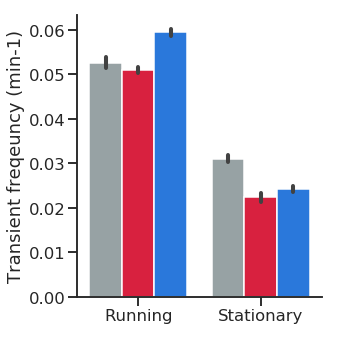

In [6]:
key = "trans_frequency"

fig = plt.figure(figsize=(6,5))

g = sns.catplot(x='interval', y=key, hue='grp',data=df_interval,
                kind='bar', ci=68)

# axis
g.set(ylabel=activity_labels[key],xlabel=' ')
sns.despine()

#legend
g._legend.remove()

# box test

<Figure size 432x360 with 0 Axes>

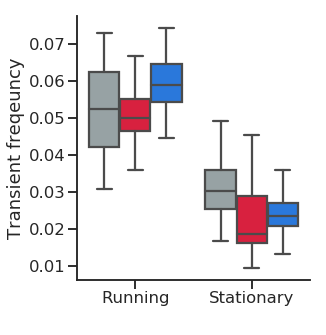

In [148]:
key = "trans_frequency"

fig = plt.figure(figsize=(6,5))

g = sns.catplot(x='interval', y=key, hue='grp',data=df_interval,
                kind='box', showfliers=False)

# axis
g.set(ylabel=activity_labels[key],xlabel=' ')
sns.despine()

#legend
g._legend.remove()

# scatter test

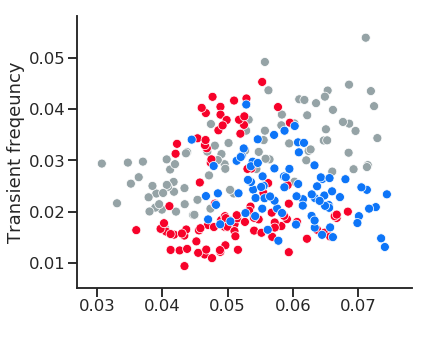

In [178]:
key = "trans_frequency"

fig = plt.figure(figsize=(6,5))

ax = sns.scatterplot(x='trans_frequency', y='trans_frequency_nr', hue='grp',data=df)

# axis
ax.set(ylabel=activity_labels[key],xlabel=' ')
sns.despine()

#legend
ax.get_legend().remove()

# agg mouse test

<Figure size 432x360 with 0 Axes>

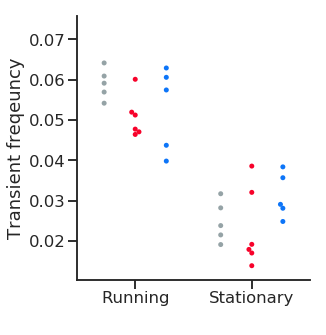

In [220]:
key = "trans_frequency"

fig = plt.figure(figsize=(6,5))

g = sns.catplot(x='interval', y=key, hue='grp',data=df_mouse_int,
                kind='swarm',dodge=True)

# axis
g.set(ylabel=activity_labels[key],xlabel=' ')
sns.despine()

#legend
g._legend.remove()

<Figure size 432x360 with 0 Axes>

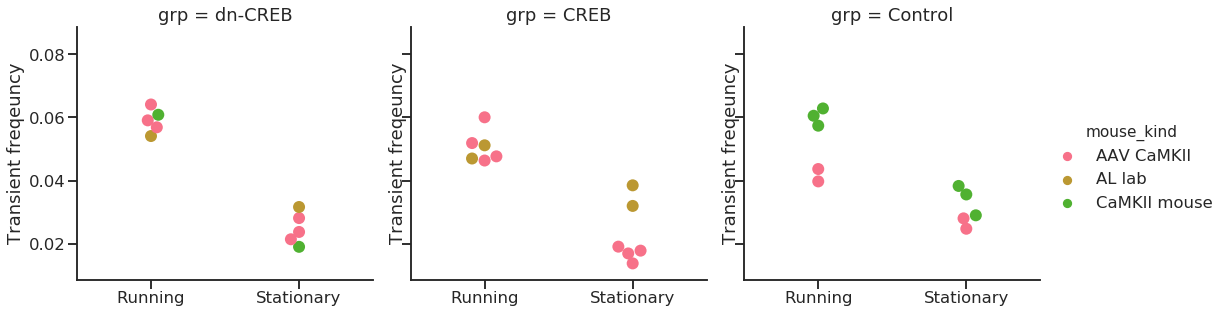

In [218]:
key = "trans_frequency"

fig = plt.figure(figsize=(6,5))

with sns.husl_palette():
    g = sns.catplot(x='interval', y=key, hue='mouse_kind',col="grp",data=df_mouse_int,
                    kind='swarm',s=12)

# axis
g.set(ylabel=activity_labels[key],xlabel=' ')
sns.despine()


<Figure size 432x360 with 0 Axes>

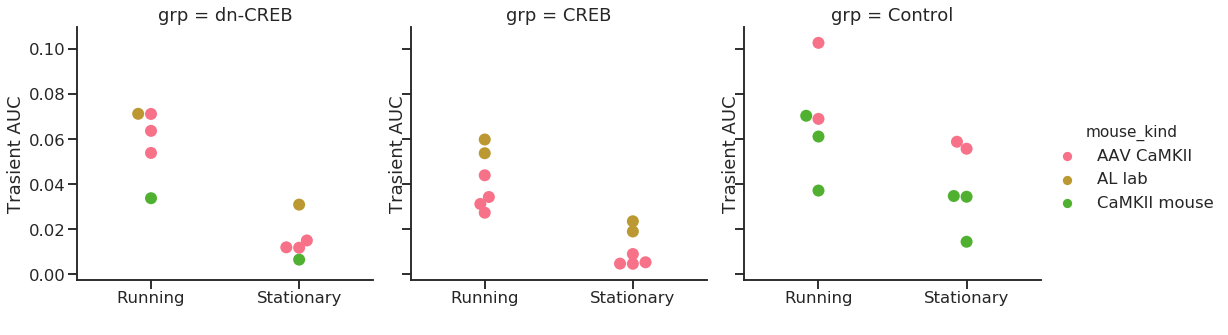

In [223]:
key = "trans_auc"

fig = plt.figure(figsize=(6,5))

with sns.husl_palette():
    g = sns.catplot(x='interval', y=key, hue='mouse_kind',col="grp",data=df_mouse_int,
                    kind='swarm',s=12)

# axis
g.set(ylabel=activity_labels[key],xlabel=' ')
sns.despine()


# box next to line - not finished

In [ ]:
key = "trans_frequency"

fig,axs = plt.subplots(1,2,figsize=(6,5))

g = sns.catplot(x='interval', y=key, hue='grp',data=df_interval,
                kind='box', showfliers=False,
               ax=axs[0])

sns.pointplot(x='int_mid', y=key, hue='grp',data=df_interval,
              capsize=.1,
              ax=axs[1],ci=68)

# axis
g.set(ylabel=activity_labels[key],xlabel=' ')
sns.despine()

#legend
g._legend.remove()

In [ ]:
'trans_auc' 'trans_amplitude' 'trans_duration'
 'trans_frequency' 'trans_auc_nr' 'trans_amplitude_nr' 'trans_duration_nr'
 'trans_frequency_nr' 'trans_auc_all' 'trans_amplitude_all'
 'trans_duration_all' 'trans_frequency_all'

# overall plots 


Error in (function (file = "", n = NULL, text = NULL, prompt = "?", keep.source = getOption("keep.source"),  : 
  <text>:1:14: unexpected assignment
1: withVisible({<-
                 ^

Error in summary(am2) : object 'am2' not found

Error in (function (file = "", n = NULL, text = NULL, prompt = "?", keep.source = getOption("keep.source"),  : 
  <text>:1:14: unexpected assignment
1: withVisible({<-
                 ^

Error in summary(am2) : object 'am2' not found

Error in (function (file = "", n = NULL, text = NULL, prompt = "?", keep.source = getOption("keep.source"),  : 
  <text>:1:14: unexpected assignment
1: withVisible({<-
                 ^

Error in summary(am2) : object 'am2' not found

Error in (function (file = "", n = NULL, text = NULL, prompt = "?", keep.source = getOption("keep.source"),  : 
  <text>:1:14: unexpected assignment
1: withVisible({<-
                 ^

Error in summary(am2) : object 'am2' not found


<Figure size 432x360 with 0 Axes>

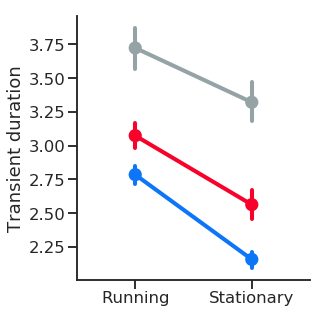

<Figure size 432x360 with 0 Axes>

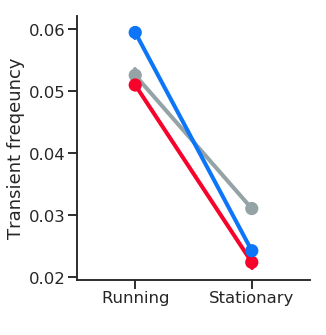

<Figure size 432x360 with 0 Axes>

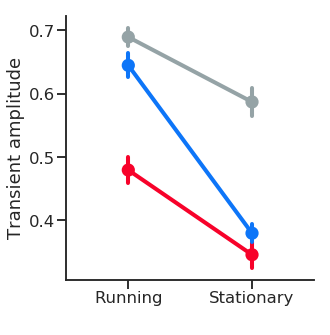

<Figure size 432x360 with 0 Axes>

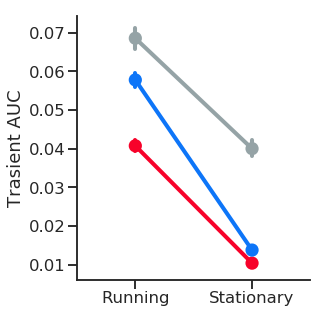

In [156]:
for key,lavel in activity_labels.items():
    
    fig = plt.figure(figsize=(6,5))

    g = sns.catplot(x='interval', y=key, hue='grp',data=df_interval,
                    kind='point',ci=68)

    # axis
    g.set(ylabel=activity_labels[key],xlabel=' ')
    sns.despine()

    #legend
    g._legend.remove()
    


<Figure size 432x360 with 0 Axes>

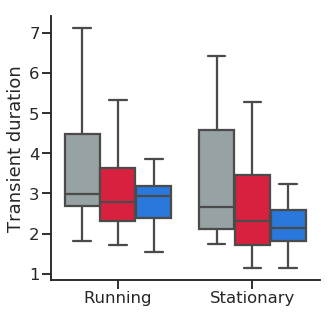

<Figure size 432x360 with 0 Axes>

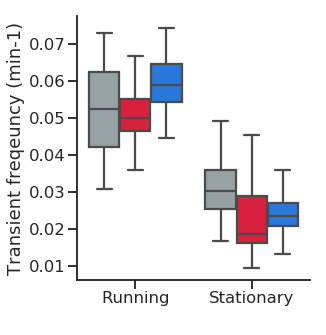

<Figure size 432x360 with 0 Axes>

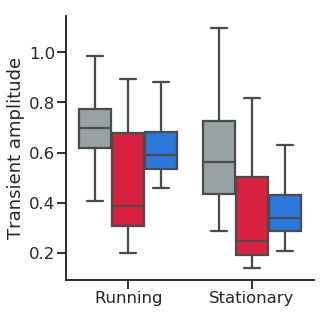

<Figure size 432x360 with 0 Axes>

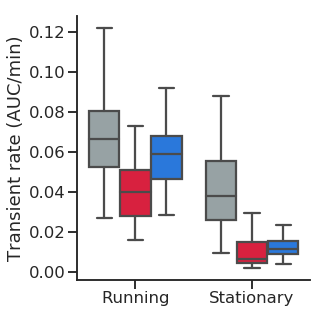

In [243]:
for key,lavel in activity_labels.items():
    
    fig = plt.figure(figsize=(6,5))

    g = sns.catplot(x='interval', y=key, hue='grp',data=df_interval,
                    kind='box', showfliers=False)

    # axis
    g.set(ylabel=activity_labels[key],xlabel=' ')
    sns.despine()

    #legend
    g._legend.remove()
    
    g.savefig('figs/F14-overall-{}.svg'.format(key))

In [ ]:
for key,label in activity_labels.items():
    
    fig = plt.figure(figsize=(6,5))

    g = sns.catplot(x='interval', y=key, hue='grp',data=df_interval,
                    kind='box', showfliers=False)

    # axis
    g.set(ylabel=label,xlabel=' ')
    sns.despine()

    #legend
    g._legend.remove()
    
    #g.savefig('figs/F14-overall-{}.svg'.format(activity_labels[key]))

# overall multi stats

In [20]:
df_run = df_interval.query("interval == 'Running'")
df_stat = df_interval.query("interval == 'Stationary'")

## running

In [165]:

for key,label in activity_labels.items():
    print('\n' + '='*25 + '\n' + '{}'.format(label) + '\n' + '='*25 + '\n')
    stats.full_anova(df_run,ind_vars=['grp'],dep_var=key)


Transient duration

# Formula: trans_duration~C(grp)
# grp: set(['Control', 'CREB', 'dn-CREB'])

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.110   
Dependent Variable: trans_duration   AIC:                792.1664
Date:               2020-01-09 14:45 BIC:                802.9282
No. Observations:   267              Log-Likelihood:     -393.08 
Df Model:           2                F-statistic:        17.52   
Df Residuals:       264              Prob (F-statistic): 7.18e-08
R-squared:          0.117            Scale:              1.1251  
-----------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-----------------------------------------------------------------
Intercept           3.0740   0.1066 28.8355 0.0000  2.8641 3.2839
C(grp)[T.Control]   0.6499   0.1559  4.1693 0.0000  0.3430 0.9568
C(grp)[T.dn-CREB]  -0.2893   0.1589 -1.8204 0.0698 -0.6022 0.

## stationary

In [225]:

for key,label in activity_labels.items():
    print('\n' + '='*25 + '\n' + '{}'.format(label) + '\n' + '='*25 + '\n')
    stats.full_anova(df_stat,ind_vars=['grp'],dep_var=key)


Transient duration

# Formula: trans_duration~C(grp)
# grp: set(['Control', 'CREB', 'dn-CREB'])

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.155   
Dependent Variable: trans_duration   AIC:                802.5365
Date:               2020-01-09 23:16 BIC:                813.2983
No. Observations:   267              Log-Likelihood:     -398.27 
Df Model:           2                F-statistic:        25.36   
Df Residuals:       264              Prob (F-statistic): 8.46e-11
R-squared:          0.161            Scale:              1.1697  
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          2.5626   0.1087 23.5762 0.0000  2.3486  2.7766
C(grp)[T.Control]  0.7587   0.1589  4.7737 0.0000  0.4458  1.0716
C(grp)[T.dn-CREB] -0.4059   0.1620 -2.5051 0.0128 -0.7250 -0.

# by day

<Figure size 432x360 with 0 Axes>

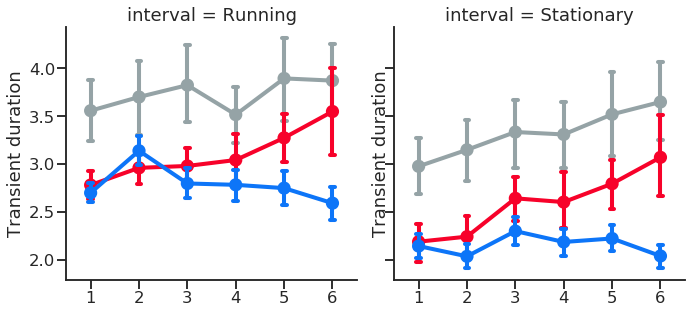

<Figure size 432x360 with 0 Axes>

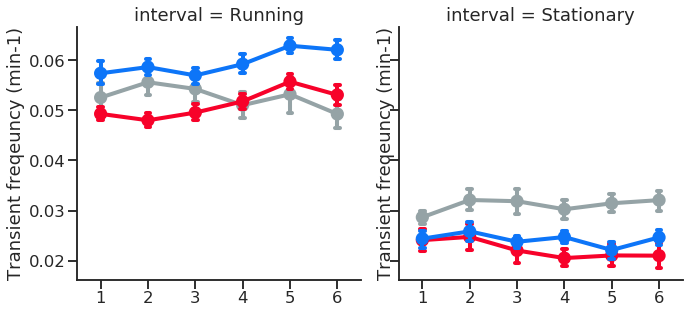

<Figure size 432x360 with 0 Axes>

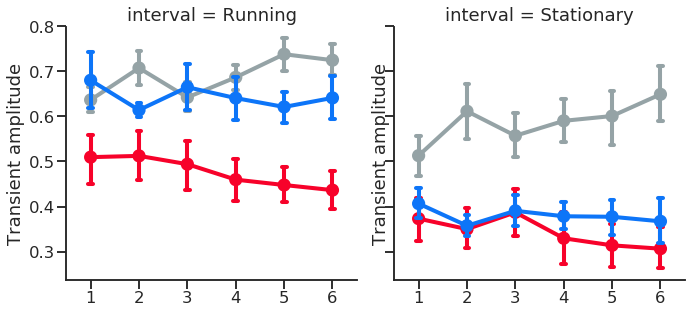

<Figure size 432x360 with 0 Axes>

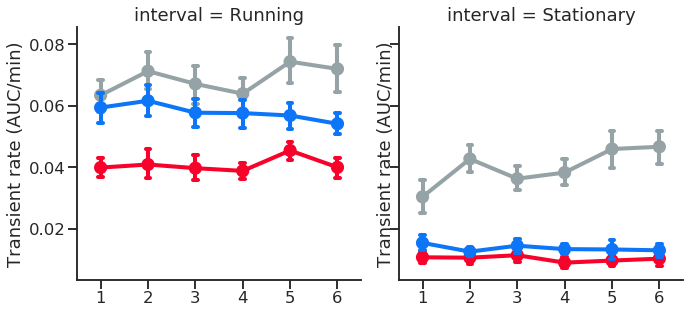

In [244]:
for key,lavel in activity_labels.items():
    
    fig = plt.figure(figsize=(6,5))

    g = sns.catplot(x = "day", col='interval', y=key, hue='grp',data=df_interval,
                    kind='point',ci=68,capsize=.1)

    # axis
    g.set(ylabel=activity_labels[key],xlabel=' ')
    sns.despine()

    #legend
    g._legend.remove()
    
    g.savefig('figs/F14-day-{}.svg'.format(key))

## stats

In [ ]:
df_run = df_interval.query("interval == 'Running'")
df_stat = df_interval.query("interval == 'Stationary'")

In [27]:
%%R -i df_run
am2 <-aov(trans_auc ~ grp*day,data = df_run)

print(summary(am2))

             Df  Sum Sq  Mean Sq F value Pr(>F)    
grp           2 0.03678 0.018390  49.819 <2e-16 ***
day           5 0.00101 0.000202   0.547  0.740    
grp:day      10 0.00132 0.000132   0.358  0.963    
Residuals   249 0.09192 0.000369                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [26]:
%%R -i df_stat
am2 <-aov(trans_auc ~ grp*day,data = df_stat)

print(summary(am2))

             Df  Sum Sq  Mean Sq F value Pr(>F)    
grp           2 0.04684 0.023419 137.802 <2e-16 ***
day           5 0.00067 0.000134   0.787   0.56    
grp:day      10 0.00235 0.000235   1.381   0.19    
Residuals   249 0.04232 0.000170                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [21]:
%%R -i df_run
am2 <-aov(trans_frequency ~ grp*day,data = df_run)

print(summary(am2))

             Df   Sum Sq   Mean Sq F value   Pr(>F)    
grp           2 0.003494 0.0017471  23.718 3.73e-10 ***
day           5 0.000493 0.0000986   1.338    0.249    
grp:day      10 0.000939 0.0000939   1.274    0.245    
Residuals   249 0.018342 0.0000737                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [23]:
%%R -i df_stat
am2 <-aov(trans_frequency ~ grp*day,data = df_stat)

print(summary(am2))

             Df   Sum Sq   Mean Sq F value   Pr(>F)    
grp           2 0.003755 0.0018775  30.260 1.72e-12 ***
day           5 0.000203 0.0000407   0.655    0.658    
grp:day      10 0.000297 0.0000297   0.478    0.903    
Residuals   249 0.015449 0.0000620                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# overall 

## transient auc

<Figure size 432x360 with 0 Axes>

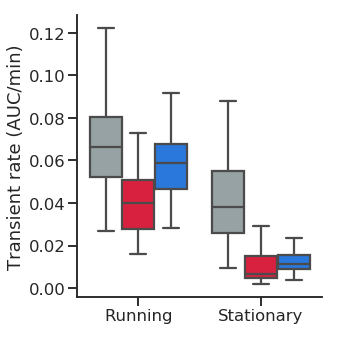

In [8]:
key = "trans_auc"

fig = plt.figure(figsize=(6,5))

g = sns.catplot(x='interval', y=key, hue='grp',data=df_interval,
                kind='box', showfliers=False)

# axis
g.set(ylabel=activity_labels[key],xlabel=' ')
sns.despine()

#legend
g._legend.remove()

In [11]:
%%R -i df_interval
am2 <-aov(trans_auc ~ grp*interval,data = df_interval)

print(summary(am2))

              Df  Sum Sq Mean Sq F value   Pr(>F)    
grp            2 0.07761 0.03880  146.79  < 2e-16 ***
interval       1 0.15363 0.15363  581.16  < 2e-16 ***
grp:interval   2 0.00601 0.00300   11.37 1.47e-05 ***
Residuals    528 0.13958 0.00026                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [15]:
for n,g in df_interval.groupby("interval"):
    
    mjdhelp.print_header(n,'day')
    stats.full_anova(g,ind_vars=['grp'],dep_var='trans_auc')


********************
day: Running
********************

# Formula: trans_auc~C(grp)
# grp: set(['Control', 'CREB', 'dn-CREB'])

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.275     
Dependent Variable: trans_auc        AIC:                -1358.6895
Date:               2020-02-03 10:07 BIC:                -1347.9278
No. Observations:   267              Log-Likelihood:     682.34    
Df Model:           2                F-statistic:        51.51     
Df Residuals:       264              Prob (F-statistic): 1.29e-19  
R-squared:          0.281            Scale:              0.00035700
--------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept          0.0407    0.0019  21.4447  0.0000  0.0370  0.0445
C(grp)[T.Control]  0.0278    0.0028  10.0230  0.0000  0.0224  0.0333


## transient frequency

<Figure size 432x360 with 0 Axes>

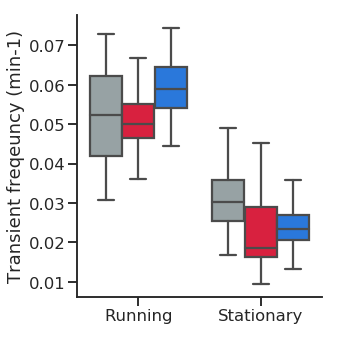

In [9]:
key = "trans_frequency"

fig = plt.figure(figsize=(6,5))

g = sns.catplot(x='interval', y=key, hue='grp',data=df_interval,
                kind='box', showfliers=False)

# axis
g.set(ylabel=activity_labels[key],xlabel=' ')
sns.despine()

#legend
g._legend.remove()

In [16]:
%%R -i df_interval
am2 <-aov(trans_frequency ~ grp*interval,data = df_interval)

print(summary(am2))

              Df  Sum Sq Mean Sq F value   Pr(>F)    
grp            2 0.00330 0.00165   24.39 7.39e-11 ***
interval       1 0.10702 0.10702 1581.80  < 2e-16 ***
grp:interval   2 0.00395 0.00197   29.18 9.51e-13 ***
Residuals    528 0.03572 0.00007                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [17]:
for n,g in df_interval.groupby("interval"):
    
    mjdhelp.print_header(n,'day')
    stats.full_anova(g,ind_vars=['grp'],dep_var='trans_auc')


********************
day: Running
********************

# Formula: trans_frequency~C(grp)
# grp: set(['Control', 'CREB', 'dn-CREB'])

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.144     
Dependent Variable: trans_frequency  AIC:                -1775.6329
Date:               2020-02-03 10:17 BIC:                -1764.8712
No. Observations:   267              Log-Likelihood:     890.82    
Df Model:           2                F-statistic:        23.33     
Df Residuals:       264              Prob (F-statistic): 4.69e-10  
R-squared:          0.150            Scale:              7.4900e-05
-------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-------------------------------------------------------------------
Intercept             0.0510   0.0009 58.6309 0.0000  0.0493 0.0527
C(grp)[T.Control]     0.0016   0.0013  1.2392 0.2164 -0.0009 0.0041